In [74]:
import logging

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import os
import cmocean
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path
import cmocean
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import datetime
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
from matplotlib import ticker, cm

In [75]:
def set_extent_and_map_axes(ax):
    # Hardangerfjord
    ldom = np.array([[58.5, 62.0], [3, 7.5]])
 #   ax.set_extent([3,7.5,58.5,62], crs=ccrs.PlateCarree())
    ax.set_xticks([3,4,5,7], crs=ccrs.PlateCarree())
    ax.set_yticks([58,59,60], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

def add_colorbar(cs, levels, ax, fig):
    steps = 4
    ticks = [float("{:.1f}".format(levels[i])) for i in range(0, len(levels), steps)]

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="3%", pad=0.1, axes_class=plt.Axes)
    fig.add_axes(ax_cb)
    clb = plt.colorbar(cs,
                       fraction=0.01,
                       orientation="vertical",
                       ticks=ticks,
                       cax=ax_cb)
    clb.ax.set_title("Depth (m)", fontsize=8)


def create_map_grid(ds, depths, levels):

    fig = plt.figure(figsize=(12, 12))
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax = set_extent_and_map_axes(ax)

    cs1 = ax.contourf(ds.lon_rho.values, ds.lat_rho.values, depths.values,
                      cmap=level_colormap(levels, cmap=plt.cm.get_cmap("RdYlBu_r")),
                      levels=levels,
                      zorder=2,
                      alpha=1.0,
                      extend="min",
                      transform=ccrs.PlateCarree())

   # ax.scatter(ds.lon_rho.values, ds.lat_rho.values, c="r", s=1, zorder=10, transform=ccrs.PlateCarree())
  #  ax.coastlines(zorder=20, linewidth=2)
  #  ax.add_feature(cfeature.LAND, color="lightgrey", zorder=20)
  #  ax.coastlines(resolution="10m", linewidth=2, color="black", alpha=1.0, zorder=4)
    ax.add_feature(cfeature.GSHHSFeature('high', edgecolor='black'), zorder=20)
    plt.grid(True, zorder=0, alpha=0.5)
    add_colorbar(cs1, levels, ax, fig)
    plotfile = "Examples/Hardangerfjorden_160m_grid.png"
    print("[CMIP6_plot] Created plot {}".format(plotfile))
    plt.savefig(plotfile, dpi=200)
    plt.show()


# -------------
# Colormap
# -------------

# Colormap, smlgn. med Rob Hetland

def level_colormap(levels, cmap=None):
    """Make a colormap based on an increasing sequence of levels"""

    # Start with an existing colormap
    if cmap == None:
        cmap = pl.get_cmap()

    # Spread the colours maximally
    nlev = len(levels)
    S = np.arange(nlev, dtype='float') / (nlev - 1)
    A = cmap(S)

    # Normalize the levels to interval [0,1]
    levels = np.array(levels, dtype='float')
    L = (levels - levels[0]) / (levels[-1] - levels[0])

    # Make the colour dictionary
    R = [(L[i], A[i, 0], A[i, 0]) for i in range(nlev)]
    G = [(L[i], A[i, 1], A[i, 1]) for i in range(nlev)]
    B = [(L[i], A[i, 2], A[i, 2]) for i in range(nlev)]
    cdict = dict(red=tuple(R), green=tuple(G), blue=tuple(B))

    # Use
    return matplotlib.colors.LinearSegmentedColormap(
        '%s_levels' % cmap.name, cdict, 256)

[CMIP6_plot] Created plot Examples/Hardangerfjorden_160m_grid.png


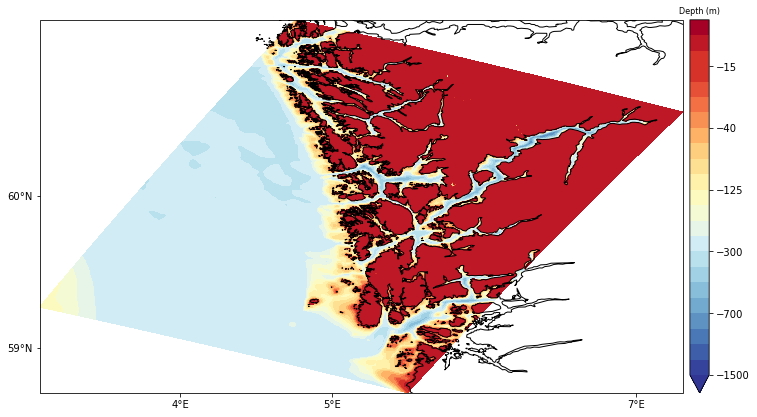

In [76]:
ds=xr.open_dataset("/Users/trondkr/Dropbox/NIVA/NAUTILOS/Hardanger/norfjords_160m_grid.nc_A04.nc")
depths = -ds.h
levels = [ -1500, -1000, -900,-800,-700,-600,-500, -400,-300,
          -200, -175, -150, -125, -100, -75, -50, -40, -30, -25,
                      -20, -15, -10, -5,0]

create_map_grid(ds, depths, levels)